In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # rasme nemodar
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
data = pd.read_csv('smoke.csv')


In [2]:
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [3]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
data.drop(['UTC', 'CNT'],axis=1,inplace=True)

In [5]:
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [6]:
data.shape

(62630, 13)

In [7]:
data.columns

Index(['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2',
       'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0',
       'NC2.5', 'Fire Alarm'],
      dtype='object')

In [8]:
data.dtypes

Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int64
eCO2[ppm]           int64
Raw H2              int64
Raw Ethanol         int64
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
Fire Alarm          int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature[C]  62630 non-null  float64
 1   Humidity[%]     62630 non-null  float64
 2   TVOC[ppb]       62630 non-null  int64  
 3   eCO2[ppm]       62630 non-null  int64  
 4   Raw H2          62630 non-null  int64  
 5   Raw Ethanol     62630 non-null  int64  
 6   Pressure[hPa]   62630 non-null  float64
 7   PM1.0           62630 non-null  float64
 8   PM2.5           62630 non-null  float64
 9   NC0.5           62630 non-null  float64
 10  NC1.0           62630 non-null  float64
 11  NC2.5           62630 non-null  float64
 12  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 6.2 MB


In [10]:
data.isna().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

In [11]:
X = data.drop('Fire Alarm', axis=1)
y=data['Fire Alarm']

In [12]:
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0


In [13]:

print(len(X))

62630


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(len(X_train))

50104


In [15]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train, y_train)

c:\Users\esmae\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
prediction = reg.predict(X_test)
prediction

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report,auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve
print("Confusion Matrix:\n",confusion_matrix(y_test,prediction))
print()
print("Classification Report:\n",classification_report(y_test,prediction))

Confusion Matrix:
 [[2251 1395]
 [ 113 8767]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.62      0.75      3646
           1       0.86      0.99      0.92      8880

    accuracy                           0.88     12526
   macro avg       0.91      0.80      0.83     12526
weighted avg       0.89      0.88      0.87     12526



In [20]:
y_prob = reg .predict_proba(X_test)
y_prob

array([[0.00433041, 0.99566959],
       [0.99794397, 0.00205603],
       [0.1195743 , 0.8804257 ],
       ...,
       [0.08033749, 0.91966251],
       [0.38219743, 0.61780257],
       [0.0322156 , 0.9677844 ]])

In [21]:
fpr, tpr, threshold = roc_curve(y_test,y_prob[:,1])
print("ROC-AUC:",auc(fpr,tpr))

ROC-AUC: 0.9573065076870617


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


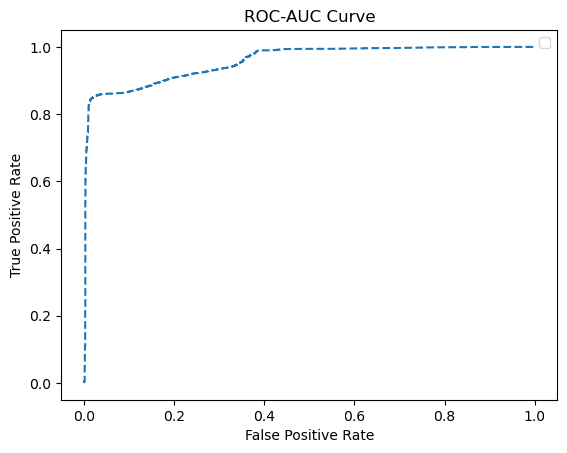

In [22]:
plt.plot(fpr,tpr,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC-AUC Curve")
plt.legend()
plt.show()

In [23]:
p, r, threshold = precision_recall_curve(y_test,y_prob[:,1])
print("PR-AUC:",auc(r,p))

PR-AUC: 0.9797335919299746


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


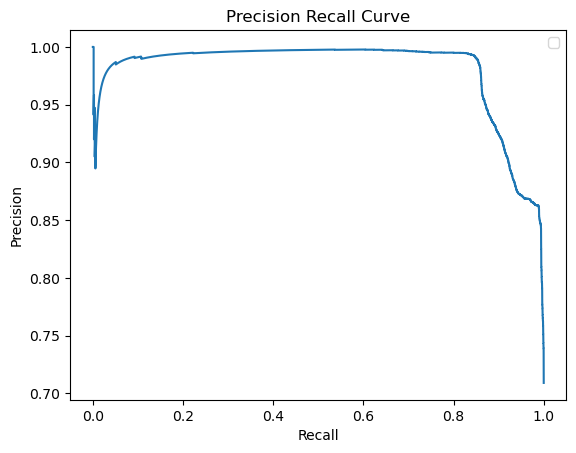

In [24]:
plt.plot(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision Recall Curve")
plt.legend()
plt.show()